# IMPORT MODULE

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
from sklearn.metrics import recall_score,precision_score,f1_score
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout,Input
%matplotlib inline

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')#connect drive to colab

Mounted at /content/drive


# READ THE DATASET

In [302]:
data = pd.read_csv('/content/drive/MyDrive/crop_prediction/Crop_recommendation.csv')

In [303]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


*The dataset above allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.*

*Data fields:*

* N - ratio of Nitrogen content in soil
* P - ratio of Phosphorous content in soil
* K - ratio of Potassium content in soil
* temperature - temperature in degree Celsius
* humidity - relative humidity in %
* ph - ph value of the soil
* rainfall - rainfall in mm


In [304]:
data.shape

(2200, 8)

In [305]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [306]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [307]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

*There are no "NaN" values in the data.*

In [308]:
data.apply(lambda x: len(x.unique()))

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [309]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

# EXPLORATORY DATA ANALYSIS

In [310]:
data.corr()

<ipython-input-310-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<ipython-input-311-5250cb9f4596>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


<Axes: >

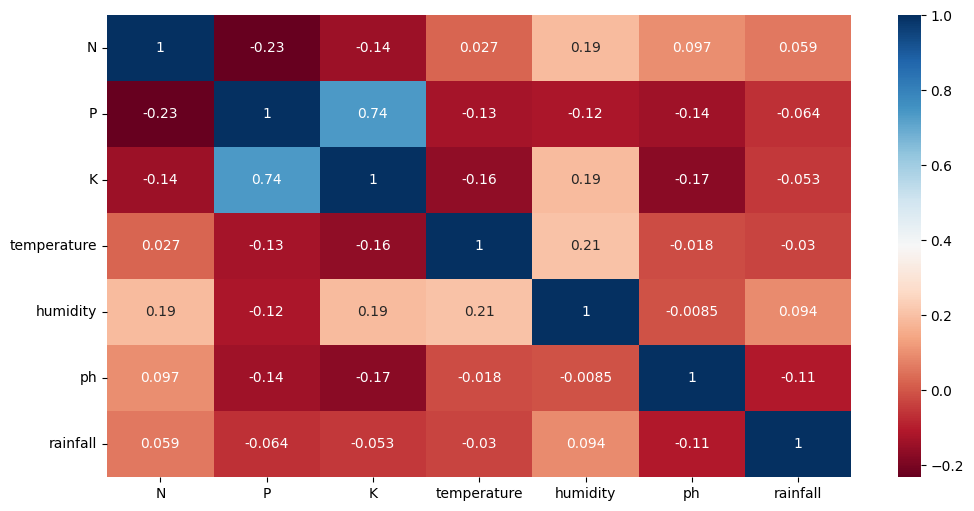

In [311]:
f,ax=plt.subplots(figsize=(12,6))
corr=data.corr()
sns.heatmap(corr , xticklabels=corr.columns,  yticklabels=corr.columns, annot=True, cmap='RdBu')

In [312]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

<ipython-input-313-1ef2d60d4f36>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['N'] , color ='red',ax=ax)
<ipython-input-313-1ef2d60d4f36>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['P'] , color ='green' , ax = ax)


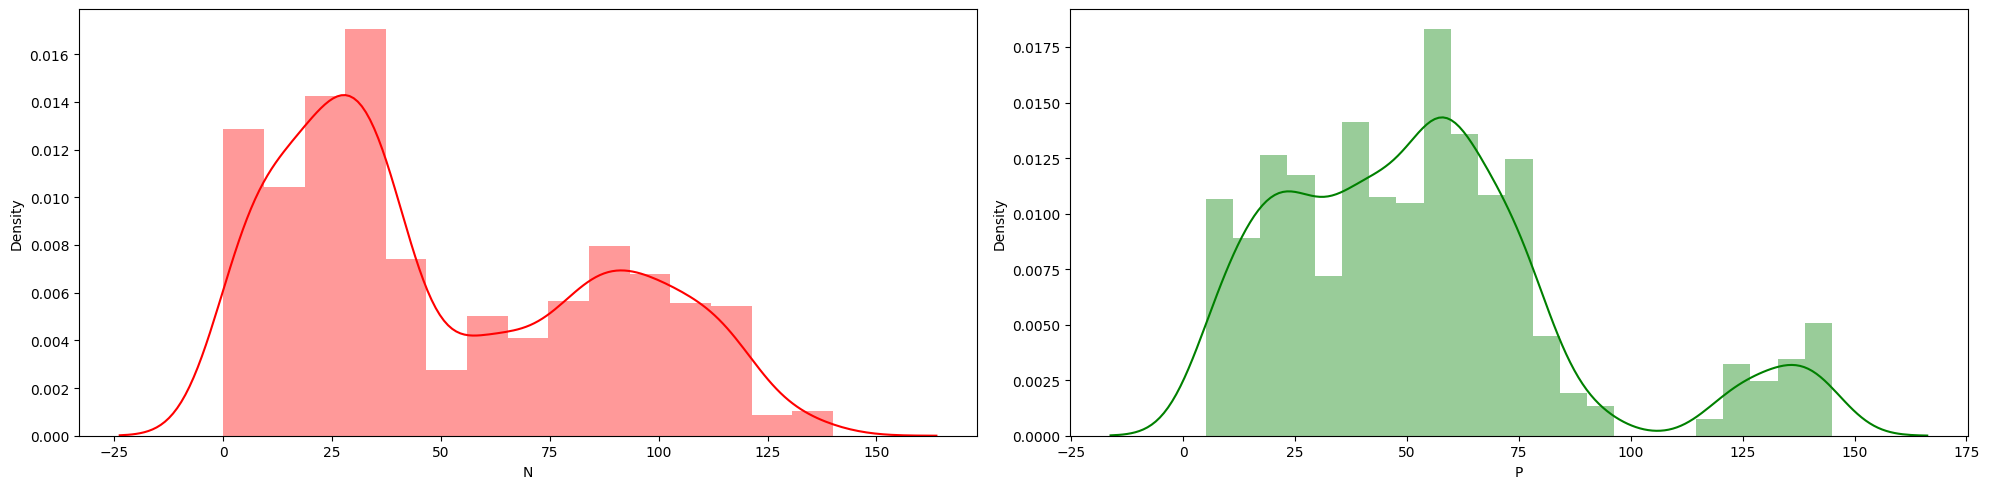

In [313]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(data['N'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(data['P'] , color ='green' , ax = ax)
plt.tight_layout()

<ipython-input-314-8a91cbd98d31>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['K'] , color ='red',ax=ax)
<ipython-input-314-8a91cbd98d31>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['temperature'] , color ='green' , ax = ax)


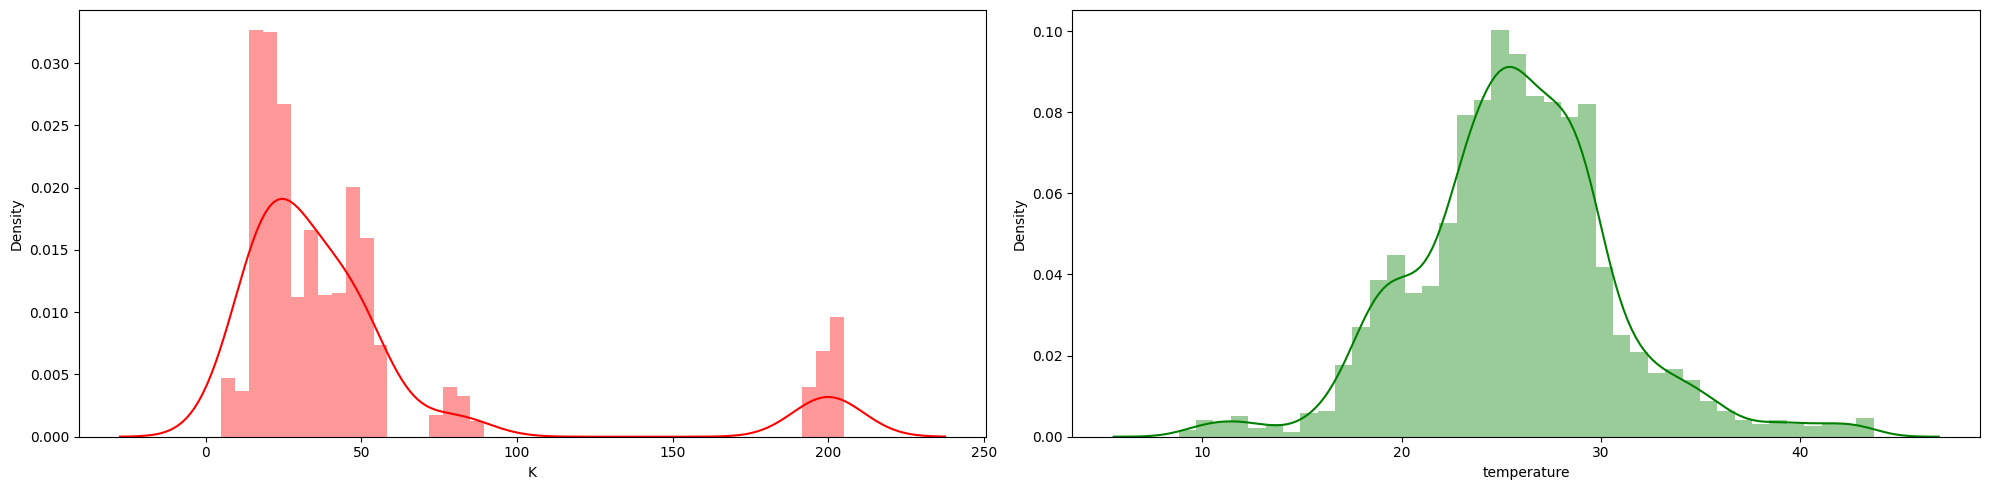

In [314]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(data['K'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(data['temperature'] , color ='green' , ax = ax)
plt.tight_layout()

<ipython-input-315-0d16c234671c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['humidity'] , color ='red',ax=ax)
<ipython-input-315-0d16c234671c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ph'] , color ='green' , ax = ax)


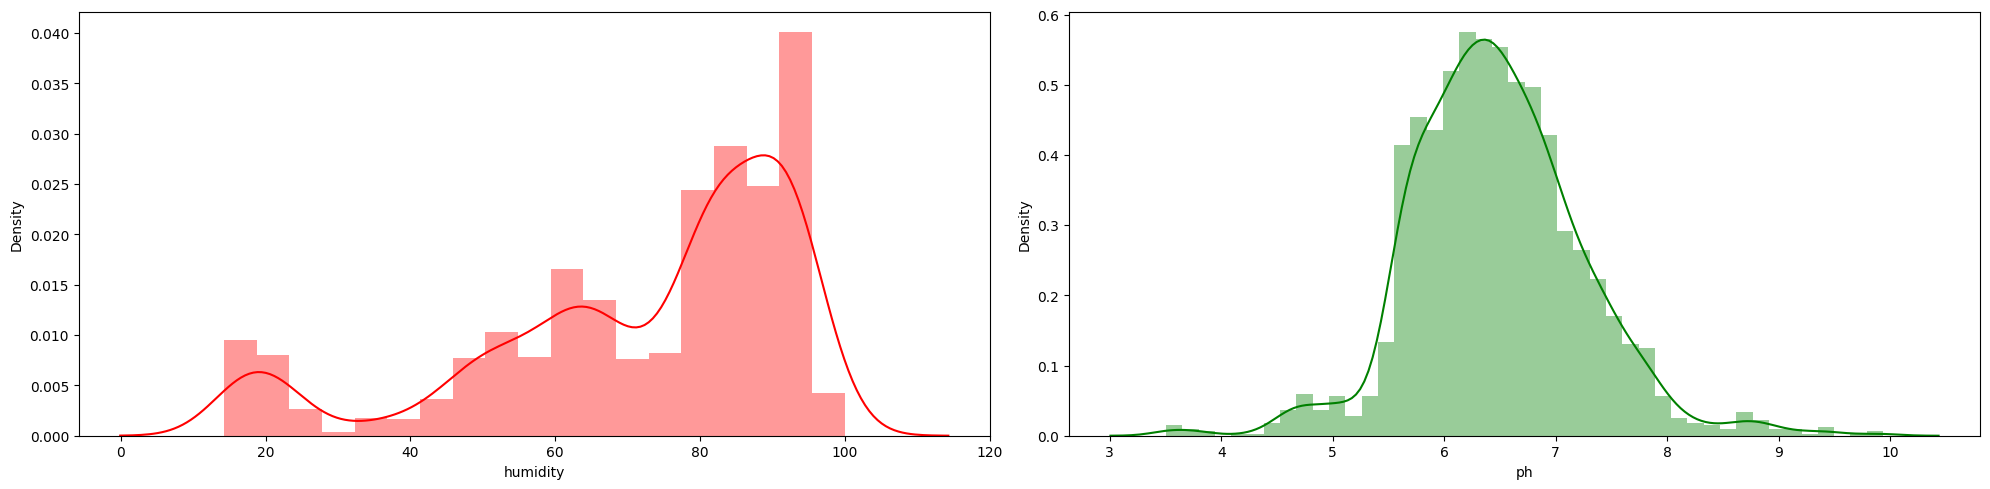

In [315]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(data['humidity'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(data['ph'] , color ='green' , ax = ax)
plt.tight_layout()

<ipython-input-316-bae0b0915cbe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['rainfall'],color ='red')


<Axes: xlabel='rainfall', ylabel='Density'>

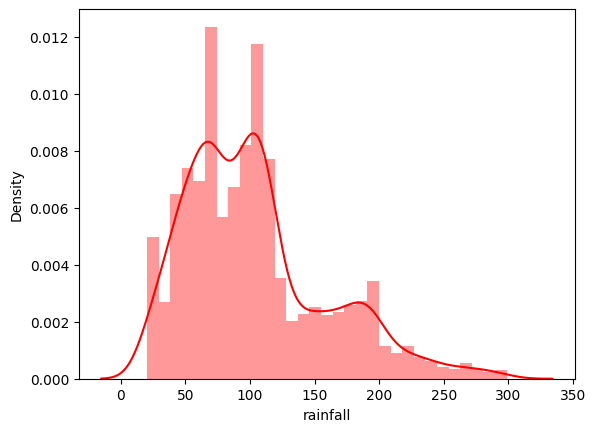

In [316]:


sns.distplot(data['rainfall'],color ='red')

# SEPERATING FEATURES AND TARGET LABEL

In [317]:
X = data.drop('label' ,axis =1)

In [318]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [319]:
from sklearn.preprocessing import LabelEncoder

In [320]:
le = LabelEncoder()

In [321]:
data['label'] = le.fit_transform(data['label'])

In [322]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [323]:
y = data['label']

In [324]:
y.head()

0    20
1    20
2    20
3    20
4    20
Name: label, dtype: int64

# TRAIN TEST SPLIT

In [334]:
model_names = []
accuracy = []

In [335]:
from sklearn.model_selection import train_test_split

In [336]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

# DECISION TREE

In [337]:
from sklearn.tree import DecisionTreeClassifier

In [338]:
DT = DecisionTreeClassifier()

In [339]:
DT.fit(X_train , y_train)

DecisionTreeClassifier()

In [340]:
DT_predict = DT.predict(X_test)

In [341]:

DT_accuracy = DT.score(X_test,y_test)

In [342]:
print("precision",precision_score(y_test,DT_predict,average='weighted'))
print("recall",recall_score(y_test,DT_predict,average='weighted'))
print("f1 score",f1_score(y_test,DT_predict,average='weighted'))

precision 0.9823637347500983
recall 0.9818181818181818
f1 score 0.9818173372521197


In [343]:

DT_accuracy

0.9818181818181818

In [344]:
accuracy.append(DT_accuracy)

In [345]:
model_names.append('Decision \n Tree')

# LOGISTIC REGRESSION

In [346]:

from sklearn.linear_model import LogisticRegression

In [347]:
LG = LogisticRegression()

In [348]:
LG.fit(X_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [349]:
LG_predict=LG.predict(X_test)

In [350]:

print("precision",precision_score(y_test,LG_predict,average='weighted'))
print("recall",recall_score(y_test,LG_predict,average='weighted'))
print("f1 score",f1_score(y_test,LG_predict,average='weighted'))

precision 0.9466475532785692
recall 0.9454545454545454
f1 score 0.9449502641281683


In [351]:
LG_accuracy = LG.score(X_test,y_test)

In [352]:

LG_accuracy

0.9454545454545454

In [353]:
accuracy.append(LG_accuracy)

In [354]:
model_names.append('Logistic \n Regression')

#Neural Network

In [355]:
def custom_activation(x):
  result = tf.where(x >= 0, x, 0.06965312312312*x)
  return result
     

In [356]:


model=Sequential()
model.add(Input(shape=(7)))
model.add(Dense(73,activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(Dense(147,activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(Dense(37,activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(Dense(22,activation='softmax'))

In [357]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [358]:
history=model.fit(X_train,y_train,epochs=18,validation_split=0.2)

Epoch 1/18
44/44 [==============================] - 2s 13ms/step - loss: 1.6601 - accuracy: 0.5732 - val_loss: 1.8692 - val_accuracy: 0.5114
Epoch 2/18
44/44 [==============================] - 0s 7ms/step - loss: 0.6488 - accuracy: 0.9077 - val_loss: 1.4414 - val_accuracy: 0.8011
Epoch 3/18
44/44 [==============================] - 0s 6ms/step - loss: 0.3956 - accuracy: 0.9339 - val_loss: 0.9730 - val_accuracy: 0.8693
Epoch 4/18
44/44 [==============================] - 0s 7ms/step - loss: 0.2885 - accuracy: 0.9446 - val_loss: 0.6690 - val_accuracy: 0.8949
Epoch 5/18
44/44 [==============================] - 0s 6ms/step - loss: 0.2627 - accuracy: 0.9382 - val_loss: 0.4010 - val_accuracy: 0.9375
Epoch 6/18
44/44 [==============================] - 0s 6ms/step - loss: 0.2003 - accuracy: 0.9545 - val_loss: 0.3075 - val_accuracy: 0.9489
Epoch 7/18
44/44 [==============================] - 0s 7ms/step - loss: 0.1575 - accuracy: 0.9624 - val_loss: 0.1917 - val_accuracy: 0.9602
Epoch 8/18
44/44 [=

In [359]:
y_prob=model.predict(X_test)
NN_predict=y_prob.argmax(axis=1)

14/14 [==============================] - 0s 2ms/step


In [360]:
print("precision",precision_score(y_test,NN_predict,average='weighted'))
print("recall",recall_score(y_test,NN_predict,average='weighted'))
print("f1 score",f1_score(y_test,NN_predict,average='weighted'))

precision 0.9738243530733649
recall 0.9704545454545455
f1 score 0.969954640947288


In [361]:
from sklearn.metrics import accuracy_score
nn_accuracy=accuracy_score(y_test,NN_predict)

In [362]:
nn_accuracy

0.9704545454545455

Text(0, 0.5, 'Loss')

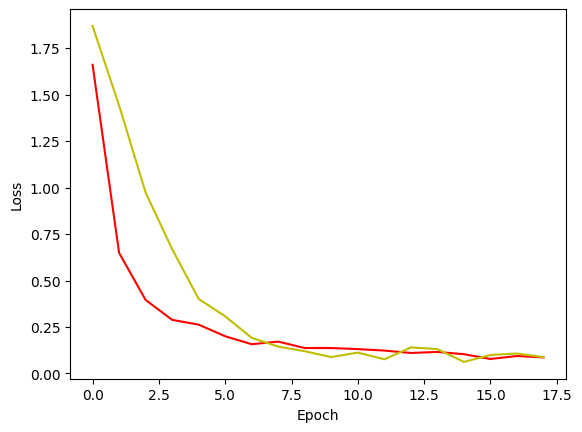

In [363]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'y')
plt.xlabel("Epoch")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

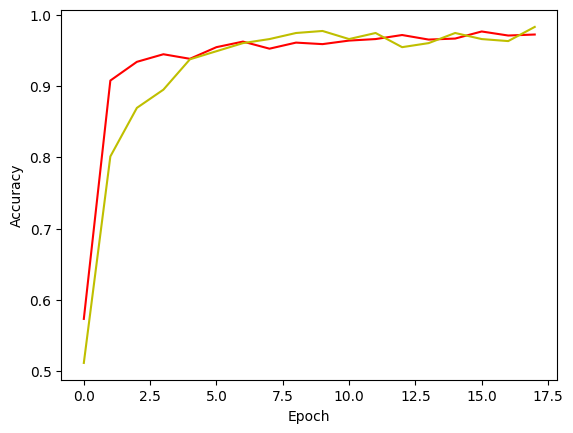

In [364]:
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'y')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

In [365]:

accuracy.append(nn_accuracy)

In [366]:

model_names.append('Neural \n Network')

#SVM

In [367]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0)


In [368]:

svm.fit(X_train,y_train)

SVC(kernel='linear')

In [369]:
SVM_predict=svm.predict(X_test)

In [370]:
svm_accuracy=svm.score(X_test,y_test)

In [371]:
print("precision",precision_score(y_test,SVM_predict,average='weighted'))
print("recall",recall_score(y_test,SVM_predict,average='weighted'))
print("f1 score",f1_score(y_test,SVM_predict,average='weighted'))

precision 0.9798471585603938
recall 0.9795454545454545
f1 score 0.9793078740515877


In [372]:
svm_accuracy

0.9795454545454545

In [373]:
accuracy.append(svm_accuracy)
model_names.append('SVM')

#KNN

In [374]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [375]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [376]:
knn_predict=knn.predict(X_test)

In [377]:
print("precision",precision_score(y_test,knn_predict,average='weighted'))
print("recall",recall_score(y_test,knn_predict,average='weighted'))
print("f1 score",f1_score(y_test,knn_predict,average='weighted'))

precision 0.9720558857355592
recall 0.9681818181818181
f1 score 0.9680464323694343


In [378]:

knn_accuracy = knn.score(X_test,y_test)

In [379]:
y_knn=knn.predict(X_test)

In [380]:
knn_accuracy

0.9681818181818181

In [381]:
accuracy.append(knn_accuracy)
model_names.append('KNN')

In [382]:
print(y_knn.size)
doc=0;
y_ensemble=[]
while doc<440:
  vote=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
  maxVote=0
  labe=-1
  vote[knn_predict[doc]]+=1
  if maxVote<vote[knn_predict[doc]]:
    label=knn_predict[doc]
    maxVote=vote[knn_predict[doc]]
  vote[SVM_predict[doc]]+=1
  if maxVote<vote[SVM_predict[doc]]:
    label=SVM_predict[doc]
    maxVote=vote[SVM_predict[doc]]
  vote[NN_predict[doc]]+=1
  if maxVote<vote[NN_predict[doc]]:
    label=NN_predict[doc]
    maxVote=vote[NN_predict[doc]]
  vote[LG_predict[doc]]+=1
  if maxVote<vote[LG_predict[doc]]:
    label=LG_predict[doc]
    maxVote=vote[LG_predict[doc]]
  vote[DT_predict[doc]]+=1
  if maxVote<=vote[DT_predict[doc]]:
    label=DT_predict[doc]
    maxVote=vote[DT_predict[doc]]
  doc+=1;
  y_ensemble.append(label)

440


In [383]:
print("precision",precision_score(y_test,y_ensemble,average='weighted'))
print("recall",recall_score(y_test,y_ensemble,average='weighted'))
print("f1 score",f1_score(y_test,y_ensemble,average='weighted'))

precision 0.9844683706816059
recall 0.9840909090909091
f1 score 0.9839989561266157


In [384]:
ensemble_accuracy=accuracy_score(y_test,y_ensemble)

In [385]:

ensemble_accuracy

0.9840909090909091

In [386]:
model_names.append('Ensemble')

In [387]:
accuracy.append(ensemble_accuracy)

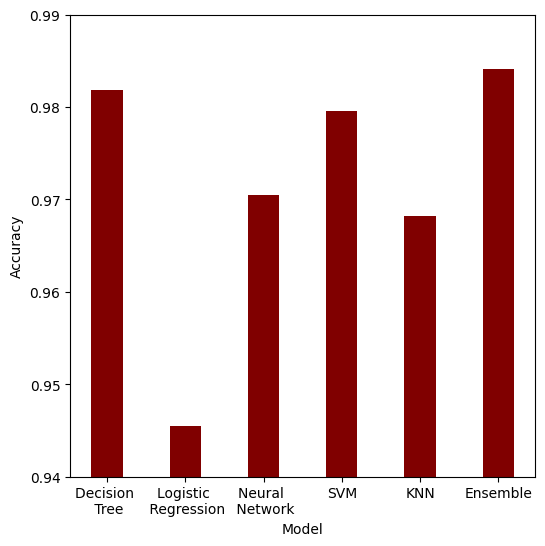

In [390]:
fig = plt.figure(figsize = (6, 6))
plt.bar(model_names, accuracy, color ='maroon', width = 0.4)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.94,0.99)
plt.show()